# Humidity

We bought a humidity sensor for our living room and it shows, that the humidity is too high.

How can we decrease the humidity in the living room?

## Definition

First, let's have a look, how humidity is defined.

$$\varphi = \frac{p}{p_{sat}\left(\theta\right)}$$

The humidity $\theta$ (%) is the ratio of partial pressure of the water vapor to the vapor pressure. The vapor pressure depends of the temperature.

According to DIN 4108, the vapor pressure can be estimated as 

$$p_{sat} = a \left( b+\frac{\theta}{\text{100°C}}\right)^n$$

This equation is valid for temperatures between 0°C and 30°C. Here $a=$ 288.68Pa, $b=$ 1.098 and $n=$ 8.02.

## Approach: Ventilation

When we ventilate the living room, we exchange the air inside the room by air from the outside. In the last section, we learned, that air has two properties: temperature $\theta$ and partial pressure $p$ of water vapor. In order to decrease the humidity and preserve the inside temperature by (a short) ventilation, the inside partial pressure needs to be higher than the outside partial pressure.

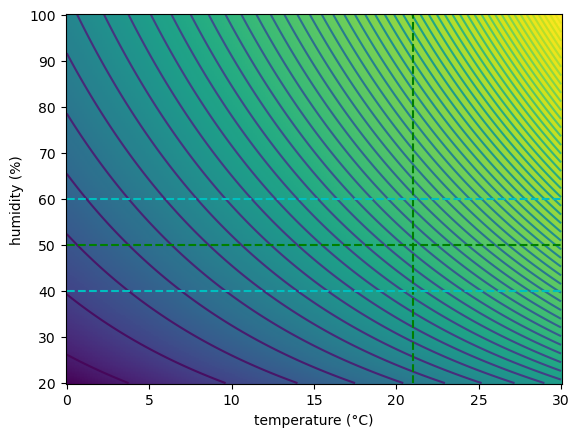

In [11]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 30, 301)
phi = np.linspace(20, 100, 300)

tt, pp = np.meshgrid(theta, phi)

psat = 288.68 * np.power(1.098 + tt/100, 8.02)
p = pp / 100 * psat 

plt.pcolor(theta, phi, np.log(p))
plt.contour(theta, phi, p, levels=60)
plt.plot([21, 21], [20, 100], 'g--')
plt.plot([0, 30], [60, 60], 'c--')
plt.plot([0, 30], [50, 50], 'g--')
plt.plot([0, 30], [40, 40], 'c--')
plt.xlabel("temperature (°C)")
plt.ylabel("humidity (%)")

plt.show()

This diagram shows the isolines of the partial pressure. The dotted lines show the optimal temperature and the range of the optimal humidity inside. And this diagram is really confusing.

The question is, when it is a good idea to air the living room. Let's define an optimal temperature of 21°C and an optimal humidity of 50%. Then a ventilation is a good idea, when the partial pressure is lower than the partial pressure for the optimal conditions.

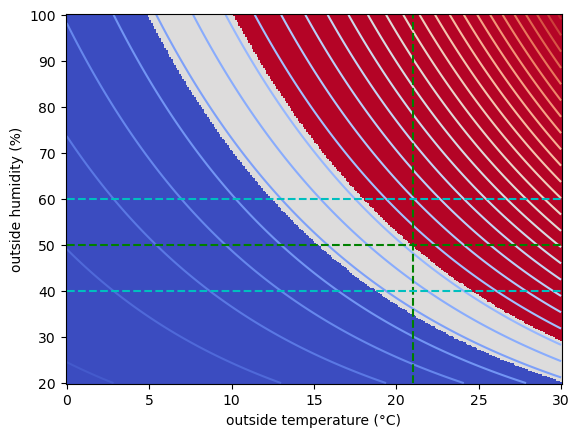

In [12]:
topt = 21
phiopt = 50
popt = phiopt / 100 * 288.68 * np.power(1.098 + topt/100, 8.02)

vent = p/popt
vent[p/popt > 0.7] = 0.5
vent[p/popt < 0.7] = 0
vent[p/popt > 1] = 1


plt.pcolor(theta, phi, vent, cmap="coolwarm")
plt.contour(theta, phi, p, levels=30, cmap="coolwarm")
plt.plot([21, 21], [20, 100], 'g--')
plt.plot([0, 30], [60, 60], 'c--')
plt.plot([0, 30], [50, 50], 'g--')
plt.plot([0, 30], [40, 40], 'c--')
plt.xlabel("outside temperature (°C)")
plt.ylabel("outside humidity (%)")

plt.show()

Now, we see outside conditions, when the inside partial pressure of water vapor decrease by ventilation in blue. Here ventilation makes perfect sense to decrease the humidity in the living room. 

In gray, we see outside conditions with little impact on the inside humidity, because the partial pressures are similar. Here the lower bound is set to $p/p_{opt} :=$ 0.7. This is defined arbitrary and requires some experimental validation. 

Finally outside conditions plotted in red increase the inside humidity, when the living room is ventilated.   

## Validation

In [13]:
p0 = 288.68 * np.power(1.098 + 0/100, 8.02)
p20 = 288.68 * np.power(1.098 + 20/100, 8.02)

# Lide (2005) see Wikipedia

print(f"Calculated pressure for T=0°C : {p0/1000:.4f} kPa, pressure according to Lide (2005) : 0.6113 kPa")
print(f"Caclulated pressure for T=20°C : {p20/1000:.4f} kPa, pressure according to Lide (2005) : 2.3388 kPa")

Calculated pressure for T=0°C : 0.6110 kPa, pressure according to Lide (2005) : 0.6113 kPa
Caclulated pressure for T=20°C : 2.3382 kPa, pressure according to Lide (2005) : 2.3388 kPa


# Literature

DIN 4108: „Wärmeschutz im Hochbau”, Beuth-Verlag

Wikipedia: [Vapour pressure of water](https://en.wikipedia.org/wiki/Vapour_pressure_of_water)